# D207 Performance Assessment: Exploratory Data Analysis (EDA)

Shanay Murdock

WGU MSDA-DS Masters Candidate

## A. Describe a real-world organizational situation or issue in the Churn dataset.

### A1. Question for Analysis

I used the Churn dataset for D205 and D206 and will continue to use it for analysis in D207. In this analysis, I want to determine if having multiple services with the company reduces the rate at which customers churn. Churn indicates the percentage of customers who start service with the company and leave for any reason. Therefore, the question is: Do customers with multiple services leave the company at a rate different from the rest of the population?

- **Null Hypothesis:** Customers with multiple services churn at the same rate as the rest of the customer population.
- **Alternate Hypothesis:** Customers with multiple services churn at a different rate than customers with only one service.
  
In simpler terms, the null hypothesis states there is no relationship between the number of services a customer has and the rate at which customers churn; the alternate hypothesis states there is a statistically significant relationship between the number of services and the churn rate.

I will work from an alpha value of **0.05** as the industry standard. This indicates a confidence interval of 95%.

### A2. Benefit from Analysis

Telecommunications is a competitive market with no shortage of options for customers. Growth certainly involves bringing on new customers, but more net growth can be maintained if we can reduce the number of customers churned. This can be accomplished by understanding why existing customers stay with the service provider.

Understanding what factors drive customer loyalty helps executives strategize marketing and promotional campaigns. If customers with multiple services with the company churn at lower rates than those with single lines of service, offering discounts for multiple services or service bundle packages may enhance the customer experience for new and existing customers.

### A3. Data Identification

The variables used in this analysis will be `churn` and `multiple_services`.


- `churn` (qualitative, ordinal): Whether or not the customer discontinued service within the last month (original data from 10,000 customers)
- `multiple_services` (qualitative/ordinal): Whether or not the customer has multiple services  (original data from 10,000 customers)

## B. Describe the data analysis

#### Set up the environment and perform initial check of data

In [1]:
# Load libraries and packages
import pandas as pd
from pandas.api.types import CategoricalDtype
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

%matplotlib inline

# Disabling deprecation warinings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the dataset
df = pd.read_csv('churn_clean.csv', index_col=0)
# Set option to not truncate results with large number of columns
pd.set_option("display.max_columns", None)
df.head()

,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,Area,TimeZone,Job,Children,Age,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
CaseOrder,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,e885b299883d4f9fb18e39c75155d990,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,38,Urban,America/Sitka,Environmental health practitioner,0,68,28561.99,Widowed,Male,No,7.978323,10,0,1,No,One year,Yes,Yes,Fiber Optic,Yes,No,Yes,Yes,No,No,No,Yes,Yes,Credit Card (automatic),6.795513,172.455519,904.536110,5,5,5,3,4,4,3,4
2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,f2de8bef964785f41a2959829830fb8a,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,10446,Urban,America/Detroit,"Programmer, multimedia",1,27,21704.77,Married,Female,Yes,11.699080,12,0,1,Yes,Month-to-month,No,Yes,Fiber Optic,Yes,Yes,Yes,No,No,No,Yes,Yes,Yes,Bank Transfer(automatic),1.156681,242.632554,800.982766,3,4,3,3,4,3,4,4
3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,f1784cfa9f6d92ae816197eb175d3c71,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,3735,Urban,America/Los_Angeles,Chief Financial Officer,4,50,9609.57,Widowed,Female,No,10.752800,9,0,1,Yes,Two Year,Yes,No,DSL,Yes,Yes,No,No,No,No,No,Yes,Yes,Credit Card (automatic),15.754144,159.947583,2054.706961,4,4,2,4,4,3,3,3
4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,dc8a365077241bb5cd5ccd305136b05e,Del Mar,CA,San Diego,92014,32.96687,-117.24798,13863,Suburban,America/Los_Angeles,Solicitor,1,48,18925.23,Married,Male,No,14.913540,15,2,0,Yes,Two Year,No,No,DSL,Yes,No,Yes,No,No,No,Yes,No,Yes,Mailed Check,17.087227,119.956840,2164.579412,4,4,4,2,5,4,3,3
5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,aabb64a116e83fdc4befc1fbab1663f9,Needville,TX,Fort Bend,77461,29.38012,-95.80673,11352,Suburban,America/Chicago,Medical illustrator,0,83,40074.19,Separated,Male,Yes,8.147417,16,2,1,No,Month-to-month,Yes,No,Fiber Optic,No,No,No,No,No,Yes,Yes,No,No,Mailed Check,1.670972,149.948316,271.493436,4,4,4,3,4,4,4,5


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 1 to 10000
Data columns (total 49 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Customer_id           10000 non-null  object 
 1   Interaction           10000 non-null  object 
 2   UID                   10000 non-null  object 
 3   City                  10000 non-null  object 
 4   State                 10000 non-null  object 
 5   County                10000 non-null  object 
 6   Zip                   10000 non-null  int64  
 7   Lat                   10000 non-null  float64
 8   Lng                   10000 non-null  float64
 9   Population            10000 non-null  int64  
 10  Area                  10000 non-null  object 
 11  TimeZone              10000 non-null  object 
 12  Job                   10000 non-null  object 
 13  Children              10000 non-null  int64  
 14  Age                   10000 non-null  int64  
 15  Income                10

In [4]:
# Transpose the summary statistics to make the results easier to read
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Zip,10000.0,49153.319600,27532.196108,601.000000,26292.500000,48869.500000,71866.500000,99929.000000
Lat,10000.0,38.757567,5.437389,17.966120,35.341828,39.395800,42.106908,70.640660
Lng,10000.0,-90.782536,15.156142,-171.688150,-97.082812,-87.918800,-80.088745,-65.667850
Population,10000.0,9756.562400,14432.698671,0.000000,738.000000,2910.500000,13168.000000,111850.000000
Children,10000.0,2.087700,2.147200,0.000000,0.000000,1.000000,3.000000,10.000000
Age,10000.0,53.078400,20.698882,18.000000,35.000000,53.000000,71.000000,89.000000
Income,10000.0,39806.926771,28199.916702,348.670000,19224.717500,33170.605000,53246.170000,258900.700000
Outage_sec_perweek,10000.0,10.001848,2.976019,0.099747,8.018214,10.018560,11.969485,21.207230
Email,10000.0,12.016000,3.025898,1.000000,10.000000,12.000000,14.000000,23.000000
Contacts,10000.0,0.994200,0.988466,0.000000,0.000000,1.000000,2.000000,7.000000


In [5]:
# Describe all columns (not just numeric columns) to get a full view of
# data
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Customer_id,10000,10000,K409198,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Interaction,10000,10000,aa90260b-4141-4a24-8e36-b04ce1f4f77b,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
UID,10000,10000,e885b299883d4f9fb18e39c75155d990,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
City,10000,6058,Houston,34,NaN,NaN,NaN,NaN,NaN,NaN,NaN
State,10000,52,TX,603,NaN,NaN,NaN,NaN,NaN,NaN,NaN
County,10000,1620,Washington,111,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Zip,10000.0,NaN,NaN,NaN,49153.3196,27532.196108,601.0,26292.5,48869.5,71866.5,99929.0
Lat,10000.0,NaN,NaN,NaN,38.757567,5.437389,17.96612,35.341828,39.3958,42.106908,70.64066
Lng,10000.0,NaN,NaN,NaN,-90.782536,15.156142,-171.68815,-97.082812,-87.9188,-80.088745,-65.66785
Population,10000.0,NaN,NaN,NaN,9756.5624,14432.698671,0.0,738.0,2910.5,13168.0,111850.0


#### Cleaning
Note: This dataset is considered clean. While that is true in the sense that there is no missing data, column headers need to be fixed and a few variables need to be re-expressed to be the right data type. The following section addresses those needs.

Code drawn from D206 Data Cleaning PA (Murdock, 2024) and modified only where there were column name changes in the starting dataset from D206 to D207.

In [6]:
# Fix column headers with Pythonic names
column_headers = {
    'CaseOrder': 'case_order',
    'Customer_id': 'customer_id',
    'Interaction': 'interaction',
    'City': 'city',
    'State': 'state',
    'County': 'county',
    'Zip': 'zip',
    'Lat': 'lat',
    'Lng': 'lng',
    'Population': 'population',
    'Area': 'area_type',
    'TimeZone': 'time_zone',
    'Job': 'job',
    'Children': 'children',
    'Age': 'age',
    'Employment': 'employment',
    'Income': 'income',
    'Marital': 'marital',
    'Gender': 'gender',
    'Churn': 'churn',
    'Outage_sec_perweek': 'outage_sec_per_week',
    'Email': 'email',
    'Contacts': 'contacts',
    'Yearly_equip_failure': 'yearly_equipment_failure',
    'Techie': 'techie',
    'Contract': 'contract',
    'Port_modem': 'portable_modem',
    'Tablet': 'tablet',
    'InternetService': 'internet_service',
    'Phone': 'phone_service',
    'Multiple': 'multiple_services',
    'OnlineSecurity': 'online_security',
    'OnlineBackup': 'online_backup',
    'DeviceProtection': 'device_protection',
    'TechSupport': 'tech_support',
    'StreamingTV': 'streaming_tv',
    'StreamingMovies': 'streaming_movies',
    'PaperlessBilling': 'paperless_billing',
    'PaymentMethod': 'payment_method',
    'Tenure': 'tenure',
    'MonthlyCharge': 'monthly_charge',
    'Bandwidth_GB_Year': 'bandwidth_gb_year',
    'Item1': 'timely_response',
    'Item2': 'timely_fixes',
    'Item3': 'timely_replacements',
    'Item4': 'reliability',
    'Item5': 'service_options',
    'Item6': 'respectful_response',
    'Item7': 'courteous_exchange',
    'Item8': 'active_listening',
}
df.rename(columns=column_headers, inplace=True)

# Change zip to string type and fill in leading 0's
df['zip'] = df['zip'].astype('str').str.zfill(5)

# Change lat and lng to string
df['lat'] = df['lat'].astype('str')
df['lng'] = df['lng'].astype('str')

# Collapse time zone categories
df['time_zone'] = df['time_zone'].replace({
    'America/Sitka': 'US/Alaska', 
    'America/Detroit': 'US/Eastern', 
    'America/Los_Angeles': 'US/Pacific',
    'America/Chicago': 'US/Central', 
    'America/New_York': 'US/Eastern', 
    # Puerto Rico observes Atlantic Standard Time year-round
    'America/Puerto_Rico': 'US/Atlantic',
    'America/Denver': 'US/Mountain', 
    'America/Menominee': 'US/Central', 
    # Phoenix observes Mountain Standard Time year-round
    'America/Phoenix': 'US/Mountain',
    'America/Indiana/Indianapolis': 'US/Eastern', 
    'America/Boise': 'US/Mountain',
    'America/Kentucky/Louisville': 'US/Eastern', 
    'Pacific/Honolulu': 'US/Hawaii',
    'America/Indiana/Petersburg': 'US/Eastern', 
    'America/Nome': 'US/Atlantic', 
    'America/Anchorage': 'US/Alaska',
    'America/Indiana/Knox': 'US/Central', 
    'America/Juneau': 'US/Alaska', 
    'America/Toronto': 'US/Eastern',
    'America/Indiana/Winamac': 'US/Eastern', 
    'America/Indiana/Vincennes': 'US/Eastern',
    'America/North_Dakota/New_Salem': 'US/Central', 
    'America/Indiana/Tell_City': 'US/Central',
    'America/Indiana/Marengo': 'US/Eastern', 
    'America/Ojinaga': 'US/Central'})

# Ensure `internet_service` values of "None" are not getting lost as null values
# on CSV import
df['internet_service'].fillna("None", inplace=True)

# Change variables to nominal categories
nominal_categories = ['area_type', 'time_zone', 
                      'marital', 'gender', 
                      'contract', 'internet_service',
                      'payment_method']
df[nominal_categories] = df[nominal_categories].astype('category')

# Simplify gender responses
df[nominal_categories] = df[nominal_categories].astype('category')

# Change variables to Booleans
bool_mapping_dict = {'No': False, 'Yes': True}
bool_variables = ['churn', 'techie', 'portable_modem', 
                  'tablet', 'phone_service', 
                  'multiple_services', 'online_security', 
                  'online_backup', 'device_protection', 
                  'tech_support', 'streaming_tv', 
                  'streaming_movies', 'paperless_billing']
df[bool_variables] = df[bool_variables].replace(bool_mapping_dict)
df[bool_variables] = df[bool_variables].astype('bool')

# Change variables to ordinal categories
survey_responses = CategoricalDtype(categories=["8", "7", "6", "5", "4", "3", "2", "1"], ordered=True)
survey_questions = ['timely_response', 'timely_fixes', 
                    'timely_replacements', 'reliability', 
                    'service_options', 'respectful_response', 
                    'courteous_exchange', 'active_listening']
df[survey_questions] = df[survey_questions].map(str)
df[survey_questions] = df[survey_questions].astype(survey_responses)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 1 to 10000
Data columns (total 49 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   customer_id               10000 non-null  object  
 1   interaction               10000 non-null  object  
 2   UID                       10000 non-null  object  
 3   city                      10000 non-null  object  
 4   state                     10000 non-null  object  
 5   county                    10000 non-null  object  
 6   zip                       10000 non-null  object  
 7   lat                       10000 non-null  object  
 8   lng                       10000 non-null  object  
 9   population                10000 non-null  int64   
 10  area_type                 10000 non-null  category
 11  time_zone                 10000 non-null  category
 12  job                       10000 non-null  object  
 13  children                  10000 non-null  int64   


### B1. Run the statistical analysis of the dataset (options: chi-square, ANOVA, or t-test)

Use a chi-square test for independence to check for proportions of two groups via a contingency table.

In [7]:
# Create a function to interpret the results of the p-value
# (Resende, 2024)
def p_value_reader(p_value, alpha):
    print(f"p-value: {p_value}")
    if p_value < alpha:
        print("Reject the Null Hypothesis")
    else:
        print("Fail to reject the Null Hypothesis")

In [8]:
# Create  a contingency table
# (Hayden, n.d.)
table = pd.crosstab(df['churn'], df['multiple_services'])
table

multiple_services,False,True
churn,,
False,4253,3097
True,1139,1511


In [9]:
# Chi-square test of independence
# (WGU Courseware), (Chapman, n.d.)
stat, p, dof, expected = chi2_contingency(table)

# Interpret p-value
alpha = 0.05
p_value_reader(p, alpha)

p-value: 1.6057318542329707e-39
Reject the Null Hypothesis


### B2. Results of Analysis

In [10]:
# Print results of Chi-square test
stat

173.03798837784385

In [11]:
# Print p-value
p

1.6057318542329707e-39

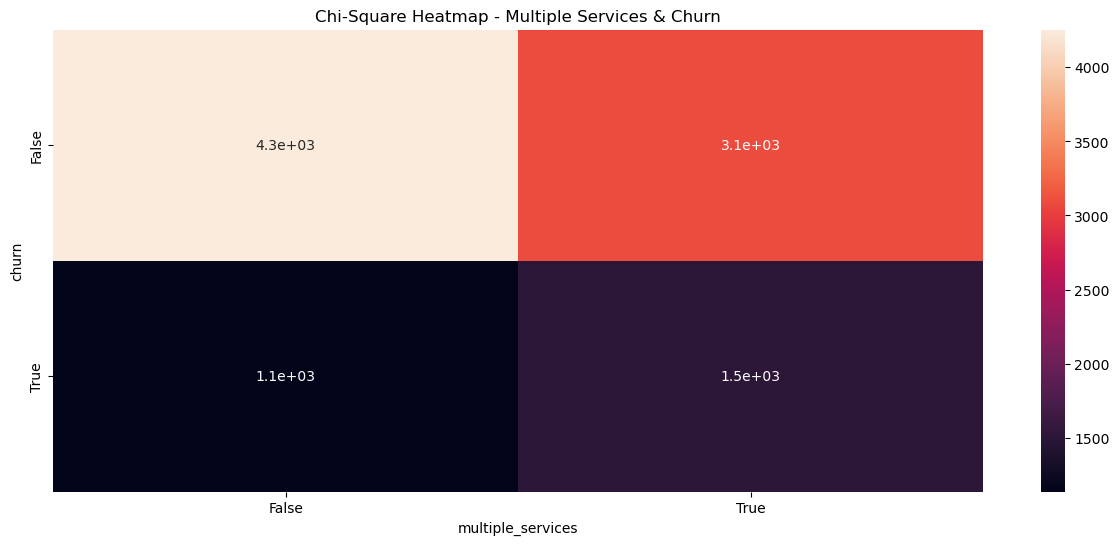

In [12]:
# Create heatmap of results
# (WGU Courseware)
plt.figure(figsize=(15, 6))
sns.heatmap(table, annot=True);
plt.title('Chi-Square Heatmap - Multiple Services & Churn');

#### Results

The chi-square test of independence returned a p-value of `1.6057318542329707e-39`. This rejects the null hypothesis, meaning the `churn` rate and `multiple_services` rate are not independent. Since the p-value is below the alpha threshold of `0.05`, there is statistically significant evidence that the two variables are related, not at random. 

### B3. Justification of Analysis Technique

I chose the chi-square test based on the type of variables I needed to answer my research question. `churn` is a categorical Boolean variable, indicating if a customer has churned in the last month or not. `multiple_services` is a categorical variable, measuring whether a customer has only one service or multiple services with the telecommunications company. 

A t-test compares the means of two groups, checking to see if they are statistically different from each other, which does not apply to this question. An ANOVA test is appropriate when checking the statistical significance of means for three or more groups, which again does not apply to this research question. The chi-square test checks the proportions of observed frequencies and the independence of the two variables.

## C1. Univariate Statistics

### Continuous Variables

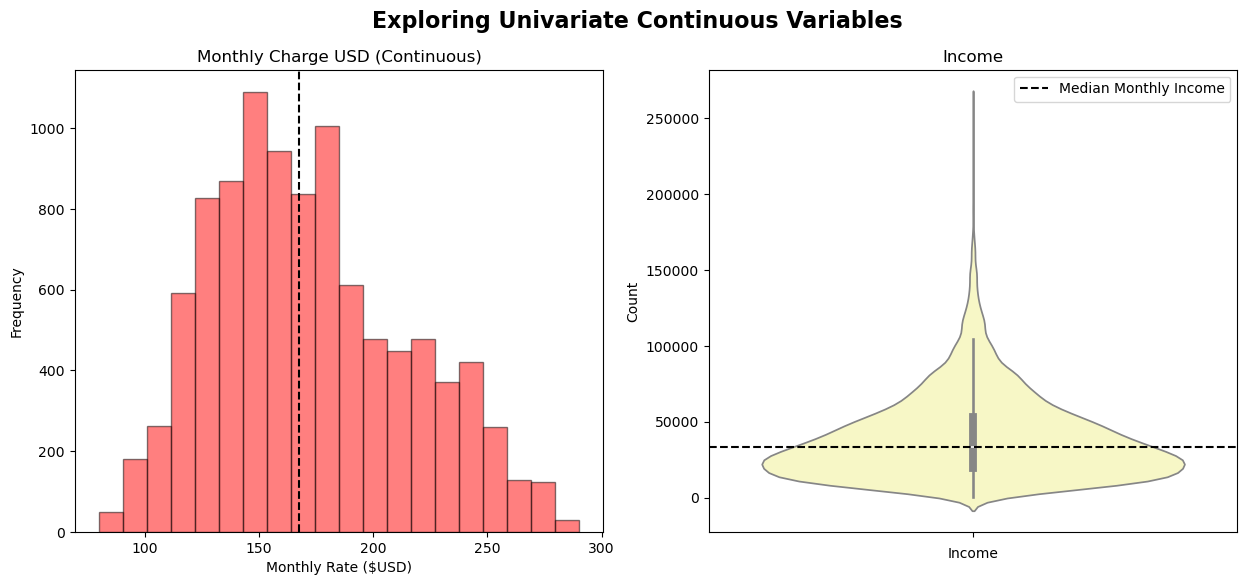

In [26]:
# CONTINUOUS VARIABLES
# monthly_charge, bandwidth_gb_year
fig, ax = plt.subplots(1, 2, figsize=(15,6))

fig.suptitle("Exploring Univariate Continuous Variables", 
             fontsize=16, 
             fontweight='bold')

# Left plot - outage_sec_per_week
ax[0].hist(df.monthly_charge,
        bins=20,
        edgecolor='black',
        color='red',
        alpha=0.5);
ax[0].axvline(df['monthly_charge'].median(),
              color='black',
              ls='dashed',
              label='Median Monthly Charge')
ax[0].set(title="Monthly Charge USD (Continuous)",
         xlabel="Monthly Rate ($USD)",
         ylabel='Frequency')

# Right plot - income
sns.violinplot(df.income,
              ax=ax[1],
              palette='Spectral');
ax[1].set(title="Income",
        xlabel="Income",
        ylabel='Count')
ax[1].axhline(df['income'].median(),
              color='black',
              ls='dashed',
              label='Median Monthly Income')

# Show the plots
plt.legend()
plt.show();

In [24]:
# Description of Continuous Variables
df[['monthly_charge', 'income']].describe()

,monthly_charge,income
count,10000.000000,10000.000000
mean,172.624816,39806.926771
std,42.943094,28199.916702
min,79.978860,348.670000
25%,139.979239,19224.717500
50%,167.484700,33170.605000
75%,200.734725,53246.170000
max,290.160419,258900.700000


### Categorical Variables

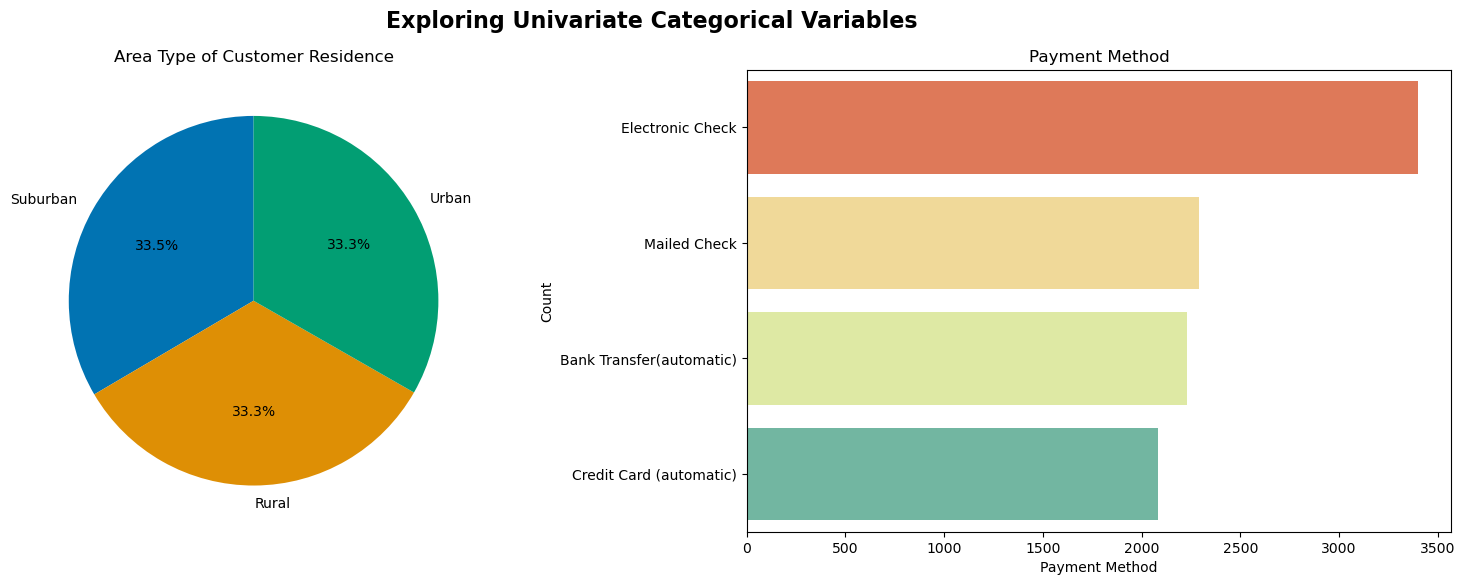

In [16]:
# CATEGORICAL VARIABLES
# area_type, payment_method
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(20,6))

# plt.figure(figsize=(15,6))
fig.suptitle("Exploring Univariate Categorical Variables", 
             fontsize=16, 
             fontweight='bold')

# Left plot - area_type
area_type_counts = df['area_type'].value_counts()
labels = ['Suburban', 'Rural', 'Urban']
colors = sns.color_palette('colorblind')
ax0.pie(area_type_counts, 
        labels=labels, 
        autopct='%1.1f%%',
        startangle=90,
       colors=colors)
ax0.set(title="Area Type of Customer Residence")

# Right plot - payment_method
order = ['Electronic Check', 'Mailed Check', 'Bank Transfer(automatic)',
         'Credit Card (automatic)']
sns.countplot(df['payment_method'], 
               ax=ax1,
             palette='Spectral', order=order)
ax1.set(title="Payment Method",
       xlabel="Payment Method",
       ylabel="Count")

# Show the plots
plt.show();

In [17]:
# Description of Categorical Variables
df[['area_type', 'payment_method']].describe()

,area_type,payment_method
count,10000,10000
unique,3,4
top,Suburban,Electronic Check
freq,3346,3398


#### Interpretation

**Continuous Variables**

The `monthly_charge` column is a continuous variable with a mostly uniform distribution but a slight right-skew. Most of the data is clustered around being in the \\$130 - \\$200 range, as seen in the histogram.

The `income` column is a continuous variable with a right-skew distribution. The violin plot shows that most values peak at approximately \\$25,000/year, the median at \\$33,170/year, and the mean (skewed from the median by outliers) at \\$39,806/year. After that, a steady decline happens around the \\$50,000 mark. We can see significant outliers when 75% of the data is at or below $$53,246/year, but the maximum value occurs at \\$258,900/year.


**Categorical Variables**

The `area_type` categorical variable is a uniform distribution, as seen in the pie plot. All three values are very close at 33.3% or 33.5%. I have questions regarding the collection of the samples and whether they were intended to be uniform or if the samples genuinely reflect the population.

The `payment_method` categorical variable is spread across the 4 options. The count plot shows that most customers use the 'Electronic Check' method, with about 1/3 more customers using this method than any other method. The rest of the values are somewhat evenly distributed across 'Bank Transfer (automatic), 'Credit Card (automatic)', and 'Mailed Check'.

## D1. Bivariate Statistics

### Continuous Variables

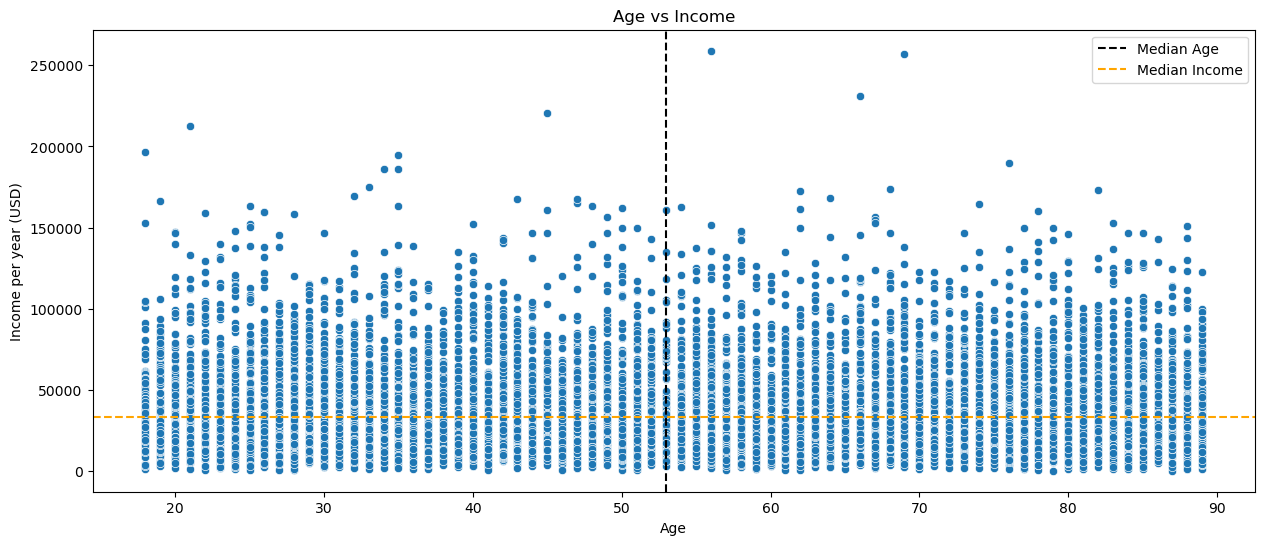

In [44]:
# Bivariate Statistics - Continuous
# Age, Bandwidth (GB/Year)
fig, ax = plt.subplots(figsize=(15,6))

sns.scatterplot(data=df, x='age', y='income', palette='colorblind')
plt.title('Age vs Income')
plt.xlabel('Age')
plt.ylabel('Income per year (USD)')

plt.axvline(df['age'].median(),
            color='black',
            ls='dashed',
            label='Median Age')

plt.axhline(df['income'].median(),
            color='orange',
            ls='dashed',
            label='Median Income')

# Show the plot
plt.legend()
plt.show()

In [36]:
# Description of Categorical Variables
df[['age', 'income']].describe()

,age,income
count,10000.000000,10000.000000
mean,53.078400,39806.926771
std,20.698882,28199.916702
min,18.000000,348.670000
25%,35.000000,19224.717500
50%,53.000000,33170.605000
75%,71.000000,53246.170000
max,89.000000,258900.700000


In [46]:
df[['age','income']].corr()

,age,income
age,1.000000,-0.004091
income,-0.004091,1.000000


### Categorical Variables

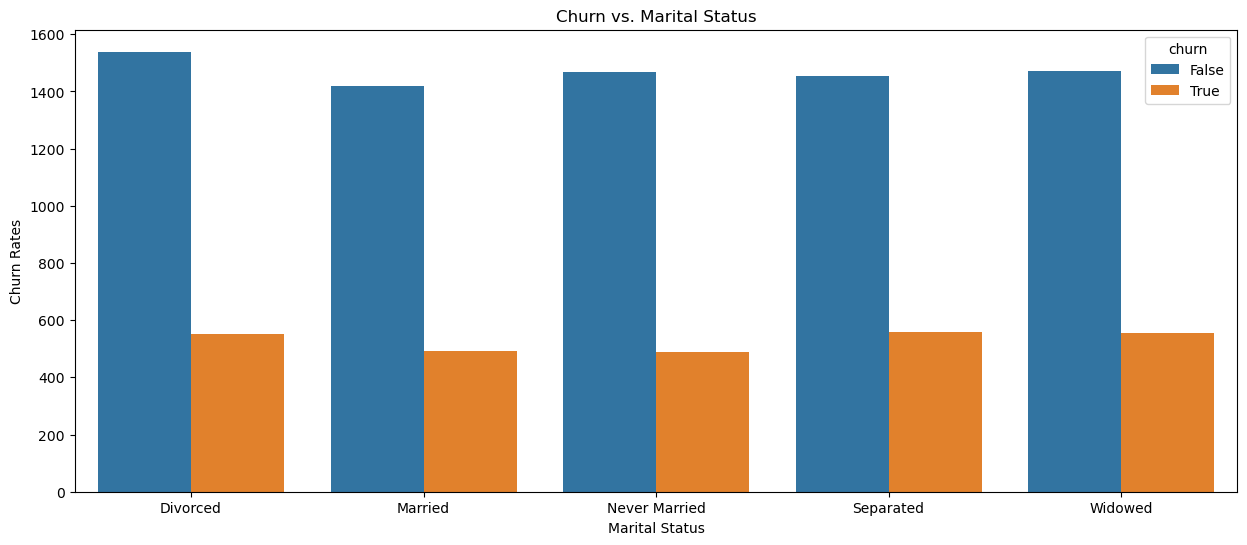

In [61]:
# Bivariate statistics - Categorical
# Count plot of churn and area type
fig, ax = plt.subplots(figsize=(15,6))

sns.countplot(data=df, x='marital', hue='churn')
plt.title("Churn vs. Marital Status")
plt.xlabel("Marital Status")
plt.ylabel("Churn Rates")
plt.show();

In [57]:
# Description of Categorical Variables
df[['churn', 'marital']].describe()

,churn,marital
count,10000,10000
unique,2,5
top,False,Divorced
freq,7350,2092


In [62]:
df['marital'].value_counts()

marital
Divorced         2092
Widowed          2027
Separated        2014
Never Married    1956
Married          1911
Name: count, dtype: int64

#### Interpretation

**Continuous Variables**

The continuous variables being compared are `age` and `income` to understand if there is a correlation between the customer's age and income level. This graph shows no correlation and a relatively uniform income distribution across ages but with many outliers across all ages.


**Categorical Variables**

The categorical variables used are `gender` and `marital`. The count plot shows the distributions of marital status are relatively uniform across the sample population. The `churn` rates appear to be slightly higher in households where the marital status is 'Divorced', 'Separated', and 'Widowed'. `churn` rates are lower in households where the marital status is 'Married' or 'Never Married'.

## E1. Results of Analysis

The null hypothesis is that customers with multiple services don't churn at a rate different than the rest of the sample population (customers with only one service). The alternate hypothesis is that customers with multiple services churn at rates (one that is statistically significant) different from the rest of the sample population.

I ran the Chi-square test on `multiple_services` and `churn` to determine if there was a statistically significant relationship between the two variables. I chose the Chi-square test as the most appropriate because both variables are categorical. Using an alpha value of `0.05` (a confidence rate of 95%), the p-value returned was `1.6057318542329707e-39`. This result is statistically significant, so we can reject the null hypothesis and accept that customers with multiple services churn at rates different from the rest of the sample population.

## E2. Limitations of Analysis

The first major limitation of this analysis is that there are only 10,000 observations that make up the sample population. When doing a nationwide study, this sample data is unlikely to be representative of the population.

A second limitation is that the area type is very evenly distributed between rural, suburban, and urban residences. I don't know if this was a strategy taken by the data collectors, but this is unlikely to be representative of the larger population and may create skews on issues like gender, income, bandwidth usage, marital status, and other demographic data that could impact churn.

Because of the small overall sample size, comparing those with multiple services that have churned (1511), those with multiple services that have not churned (3097), those with one service that have churned (1139), and those with one service that have not churned (4253), the proportions to work with drops drastically.

This data is also limited to one specific company, not the telecommunications industry more generally. As this industry is not heavily monopolized across the United States, where customers usually have at least 2 or 3 options in their locale, having data from only one company fails to represent customers more broadly across the U.S.

## E3. Recommended Course of Action

While the p-value allows us to reject the null hypothesis and accept the alternate hypothesis, the results were not what I expected. To scale, those customers with multiple services churn at a rate higher than those with only one service. This is surprising as I intuitively think customers with multiple/bundled services would express a higher loyalty rate because of the simplicity of billing, providers, etc.

Because these customers churn at a higher rate, it's worth further investigating their grouping of services and seeing if one or more services are causing them to leave the company altogether. If a specific service (or its reliability) is causing customers to leave, executives could strategize around improving the service or reducing the factors that cause customers to leave for another telecommunications company.

## F. Panopto Video Link

## G. Code Resources

- [Bobbit, Z., 2021: How to Create a Pie Chart in Seaborn](https://www.statology.org/seaborn-pie-chart/)
- [Hayden, L. (n.d.). Performing Experiments in Python. Retrieved March 2, 2024](https://app.datacamp.com/learn/courses/performing-experiments-in-python)
- [Matplotlib. (2023) Matplotlib 3.9.1 Documentation.](https://matplotlib.org/stable/index.html) 
- [(n.d.). Scipy.Stats.Chisquare. SciPy Documentation. Retrieved June 14, 2024](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chisquare.html#scipy.stats.chisquare) 
- [Resende, D. (2024). Statistics Bootcamp (with Python): Zero to Mastery](https://academy.zerotomastery.io/courses/enrolled/2341549) 
- [Seaborn: statistical data visualization. (2024). Seaborn Documentation.](https://seaborn.pydata.org)
- Walker, M. (2024). Python Data Cleaning Cookbook (2nd ed.). Packt Publishing.

## H. Other Resources

- Bruce, P., Bruce, A., & Gedeck, P. (2020). Practical Statistics for Data Scientists: 50+ Essential Concepts Using R and Python (2nd ed.). O'Reilly Media Inc.
- McKinney, W. (2022). Python for Data Analysis: Data Wrangling with Pandas, NumPy, and IPython (3rd ed.). O'Reilly Media Inc.